In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Variable description

### PAY_N
Repayment status (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

In [3]:
f = open("data/variables.txt", "r")
print(f.read())

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 

In [4]:
train.iloc[:,[1,2,3,4,5]].head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,300000.0,1,1,1,45
1,90000.0,2,2,1,48
2,360000.0,2,3,2,38
3,30000.0,2,2,1,30
4,150000.0,2,3,1,48


In [5]:
train.loc[:,['PAY_0', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2']].head()

,PAY_0,PAY_2,BILL_AMT1,BILL_AMT2,PAY_AMT1,PAY_AMT2
0,-1,-1,999.0,-7334.0,0.0,24000.0
1,0,0,43810.0,44504.0,1723.0,2393.0
2,-1,-1,1638.0,3060.0,3060.0,0.0
3,-1,2,4994.0,886.0,0.0,1000.0
4,0,0,36717.0,37800.0,2000.0,4000.0


In [6]:
train.iloc[:,[12,13,14,15,16,17]].head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,999.0,-7334.0,8333.0,6666.0,8333.0,8333.0
1,43810.0,44504.0,46174.0,47193.0,48105.0,49327.0
2,1638.0,3060.0,0.0,0.0,1444.0,-1382.0
3,4994.0,886.0,937.0,0.0,1083.0,3395.0
4,36717.0,37800.0,40874.0,39922.0,40953.0,42136.0


In [7]:
train.iloc[:,[18,19,20,21,22,23]].head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,24000.0,6666.0,10000.0,8333.0,15449.0
1,1723.0,2393.0,2090.0,2000.0,2000.0,1803.0
2,3060.0,0.0,0.0,1444.0,1382.0,0.0
3,0.0,1000.0,398.0,1083.0,3395.0,7383.0
4,2000.0,4000.0,0.0,2000.0,2000.0,2000.0


In [8]:
train.iloc[:,[24]].head()

,default.payment.next.month
0,1
1,0
2,0
3,0
4,0


In [9]:
train.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0,300000.0,1,1,1,45,-1,-1,-1,-1,...,6666.0,8333.0,8333.0,0.0,24000.0,6666.0,10000.0,8333.0,15449.0,1
1,1,90000.0,2,2,1,48,0,0,0,0,...,47193.0,48105.0,49327.0,1723.0,2393.0,2090.0,2000.0,2000.0,1803.0,0
2,2,360000.0,2,3,2,38,-1,-1,-1,-2,...,0.0,1444.0,-1382.0,3060.0,0.0,0.0,1444.0,1382.0,0.0,0
3,3,30000.0,2,2,1,30,-1,2,-1,-1,...,0.0,1083.0,3395.0,0.0,1000.0,398.0,1083.0,3395.0,7383.0,0
4,4,150000.0,2,3,1,48,0,0,0,2,...,39922.0,40953.0,42136.0,2000.0,4000.0,0.0,2000.0,2000.0,2000.0,0


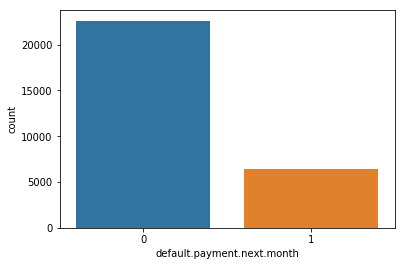

In [10]:
sns.countplot(x='default.payment.next.month',data=train)

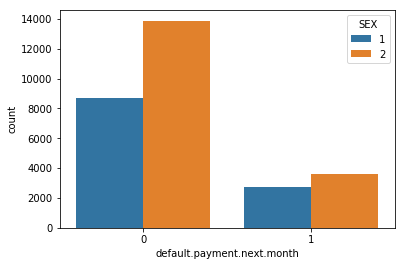

In [11]:
sns.countplot(x='default.payment.next.month',hue='SEX',data=train)

In [12]:
y = 'default.payment.next.month'
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 25 columns):
Unnamed: 0                    29000 non-null int64
LIMIT_BAL                     29000 non-null float64
SEX                           29000 non-null int64
EDUCATION                     29000 non-null int64
MARRIAGE                      29000 non-null int64
AGE                           29000 non-null int64
PAY_0                         29000 non-null int64
PAY_2                         29000 non-null int64
PAY_3                         29000 non-null int64
PAY_4                         29000 non-null int64
PAY_5                         29000 non-null int64
PAY_6                         29000 non-null int64
BILL_AMT1                     29000 non-null float64
BILL_AMT2                     29000 non-null float64
BILL_AMT3                     29000 non-null float64
BILL_AMT4                     29000 non-null float64
BILL_AMT5                     29000 non-null float64
BILL_AMT6   

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(y,axis=1), 
                                                    train[y], test_size=0.30, 
                                                    random_state=101)

In [14]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.78      1.00      0.87      6760
          1       0.00      0.00      0.00      1940

avg / total       0.60      0.78      0.68      8700



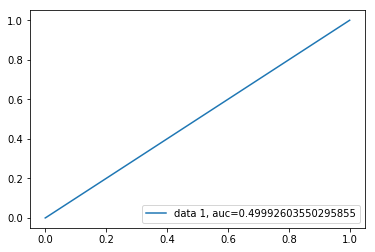

In [23]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=predictions, pos_label=1)
auc = roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()